# Big Data Fundamentals via PySpark

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark import SparkContext

sc = SparkContext(appName = "DataCamp")

## Introduction to Big Data analysis with Spark

The 3 V's of Big Data
- Volume
- Variety
- Velocity

### Understanding SparkContext

A SparkContext represents the entry point to Spark functionality.

In [3]:
# print the version of SparkContext
print("The version of Spark Context is", sc.version)

The version of Spark Context is 2.4.3


In [4]:
# Print the Python version of SparkContext
print("The Python version of Spark Context is", sc.pythonVer)

The Python version of Spark Context is 3.6


In [5]:
# Print the master of SparkContext
print("The master of Spark Context is", sc.master)

The master of Spark Context is local[*]


### Interactive Use of PySpark

In [6]:
# create a python list of numbers from 1 to 100
numb = range(1, 100)

# load the list into PySpark
spark_data = sc.parallelize(numb)

### Loading data in PySpark shell

In [7]:
# load a local file into PySpark shell
lines = sc.textFile("../data/iu_wiki.txt")

### Use of lambda() with map()

In [8]:
my_list = list(range(1,11))
# print my_list in the console
print("Input list is", my_list)

# square all the numbers in my_list
squared_my_list = list(map(lambda x: x**2, my_list))

# print the result of map function
print("The squared numbers are", squared_my_list)

Input list is [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
The squared numbers are [1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


### Use of lambda() with filter()

In [9]:
my_list2 = [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
# print my_list2 in the console
print("Input list is:", my_list2)

# Filter nyumbers divisible by 10
filtered_list = list(filter(lambda x: x %10 == 0, my_list2))

# print the numbers divisible by 10
print("Numbers divisible by 10 are:", filtered_list)

Input list is: [10, 21, 31, 40, 51, 60, 72, 80, 93, 101]
Numbers divisible by 10 are: [10, 40, 60, 80]


## Programming in PySpark RDD's

The main abstraction Spark provides is a resilient distributed dataset (RDD), which is the fundamental and backbone data type of this engine. This chapter introduces RDDs and shows how RDDs can be created and executed using RDD Transformations and Actions.

- Resilient: Ability to withstand failures
- Distributed: Spanning across multiple machines
- Datasets: Collection of partitioned data e.g, Arrays, Tables, Tuples, etc.


### RDDs from Parallelized collections

In [10]:
# create an RDD from a list of words
RDD = sc.parallelize(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# print out the type of the created object
print("The type of RDD is", type(RDD))

The type of RDD is <class 'pyspark.rdd.RDD'>


### RDDs from External Datasets

In [11]:
file_path = "../data/iub_wiki.txt"
# print th file_path
print("The file_path is", file_path)

# create a fileRDD from file_path
fileRDD = sc.textFile(file_path)

# check the type of fileRDD
print("The file type of fileRDD is", type(fileRDD))

The file_path is ../data/iub_wiki.txt
The file type of fileRDD is <class 'pyspark.rdd.RDD'>


### Partitions in your data

In [12]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

# create a fileRDD_part from file_ath with 5 partitions
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

# check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD is 2
Number of partitions in fileRDD_part is 5


### Basic RDD Transformation and Actions

Overview of PySpark operations
- Transformations create new RDDS
- Actions perform computation on the RDDs

Basic RDD Transformations
- `map()`, `filter()`, `flatMap()`, and `union()`

Basic RDD Actions
- `collect()`, `take(N)`, `first()`, `count()`

### Map and Collect

In [13]:
numbRDD = sc.parallelize(range(1,11))
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: x*x*x)

# collect the results
numbers_all = cubedRDD.collect()

# Print the numbers from numbers_all
for numb in numbers_all:
    print(numb)

1
8
27
64
125
216
343
512
729
1000


### Filter and Count

In [14]:
# Filter the fileRDD to select lines with Indiana keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Indiana' in line)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Indiana is", fileRDD_filter.count())

# Print the first four lines of fileRDD
for line in fileRDD_filter.take(4):
    print(line)

The total number of lines with the keyword Indiana is 4
Indiana University Bloomington (abbreviated "IU Bloomington"[5] and colloquially referred to as "IU" or simply "Indiana") is a public research university located in Bloomington, Indiana, United States.[6] With over 48,000 students, IU Bloomington is the flagship institution of the Indiana University system and its largest university.[7]
As of Fall 2015, 48,514 students attend Indiana University. While 55.2% of the student body was from Indiana, students from 49 of the 50 states, Washington D.C., and 165 foreign nations were also enrolled.[3] The university is home to an extensive student life program, with more than 750 student organizations on campus and with more than 17 percent of undergraduates joining the Greek system.[9] Indiana athletic teams compete in Division I of the NCAA and are known as the Indiana Hoosiers. The university is a member of the Big Ten Conference.
Among IU Bloomington’s many graduate-level programs are t

### Pair RDDS in PySpark

Introduction to pair RDDs in PySpark
- Real life datasets are usually key/value pairs
- Each row is a key and maps to one or more values
- Pair RDD is a special data structure to work with this kind of datasets
- Pair RDD: Key is the identifier and value is data

Creating pair RDDs
Two common ways to create pair RDDs
- From a list of key-value tuple
- From a regular RDD

Transformations on pair RDDS
- `reduceByKey(func)`: Combine values with the same key
- `groupByKey()`: Group values with the same key
- `sortByKey()`: Return an RDD sorted by the key
- `join()`: Join two pair RDDs based on their key

### ReduceByKey and Collect

In [15]:
# Create PairRDD with key value pairs
Rdd = sc.parallelize([(1,2),(3,4),(3,6),(4,5)])

# apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: x + y)

# iterate over the result and print the output
for num in Rdd_Reduced.collect():
    print("Key {} has {} Counts".format(num[0], num[1]))

Key 4 has 5 Counts
Key 1 has 2 Counts
Key 3 has 10 Counts


### SortByKey and Collect

In [16]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.sortByKey(ascending = False)

# iterate over the result and print the output
for num in Rdd_Reduced_Sort.collect():
    print("Key {} has {} counts".format(num[0], num[1]))

Key 4 has 5 counts
Key 3 has 10 counts
Key 1 has 2 counts


### Advanced RDD Actions

- `reduce(func)`: action is used for aggregating the elements of a regular RDD
- `saveAsTextFile()`: actions saves RDD into a text file inside a directory with each partition as a separate file

Pair RDD Actions
- `countByKey()`: action counts the number of elemenets for each key
- `collectAsMap()`: return the key-value pairs in the RDD as a dictionary

### CountingByKeys

In [17]:
# transform the rdd with countByKey()
total = Rdd.countByKey()

# What is the type of total?
print("The type of total is", type(total))

# iterate over the total and print the output
for k,v in total.items():
    print("key", k, "has", v, "count")

The type of total is <class 'collections.defaultdict'>
key 1 has 1 count
key 3 has 2 count
key 4 has 1 count


### Create a base RDD and transform it

In [18]:
file_path = "../data/DataCamp/Big Data Fundamentals via PySpark/Complete_Shakespeare.txt"
# create a baseRDD from the file path
baseRDD = sc.textFile(file_path)

# split the lines of baseRDD into words
splitRDD = baseRDD.flatMap(lambda x: x.split(" "))

# count the total number of words
print("Total number of words in splitRDD:", splitRDD.count())

Total number of words in splitRDD: 194074


### Remove stop words and reduce the dataset

In [19]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were',
 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a',
 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should',
 'now']

# convert the words in lower case and remove stop words from stop_words
splitRDD_no_stop = splitRDD.filter(lambda x: x.lower() not in stop_words)

# create a tuple of the word and 1
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (w, 1))

# count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.reduceByKey(lambda x, y: x + y)

### Print word frequencies

In [20]:
# Display the first 10 words and their frequencies
for word in resultRDD.take(10):
    print(word)
    
# swap the keys and values
resultRDD_swap = resultRDD.map(lambda x: (x[1], x[0]))

# sort the keys in descending order
resultRDD_swap_sort = resultRDD_swap.sortByKey(ascending = False)

# Show the top 10 most frequent words and their frequencies
for word in resultRDD_swap_sort.take(10):
    print("{} has {} counts".format(word[1], word[0]))

('Project', 9)
('EBook', 1)
('Shakespeare', 12)
('', 65498)
('use', 38)
('anyone', 1)
('anywhere', 1)
('restrictions', 1)
('whatsoever.', 1)
('may', 162)
 has 65498 counts
thou has 650 counts
thy has 574 counts
shall has 393 counts
would has 311 counts
good has 295 counts
thee has 286 counts
love has 273 counts
Enter has 269 counts
th' has 254 counts


## PySpark SQL & DataFrames

### Abstracting Data with DataFrames

SparkSession - Entry point for DataFrame API
- SparkContext is the main entry point for creating RDDs
-SparkSession provides a single point of entry to interact with Spark DataFrames
- SparkSession is used to create DataFrame, register DataFrames, execute SQL queries
- SparkSession is available in PySpark Shell as `spark`

Two different methods of creating DataFrames in PySpark
- From existing RDDs using SparkSession's createDataFrame() method
- From various data sources (CSV,JSON,TXT) using SParkSession's read method

What is Schema?
- Schema controls the data and helps DataFrames to optimize queries
- Schema provides information about column name, type of data in the column, empty values etc..

### RDD to DataFrame

In [21]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [22]:
# create a list of tuples
sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]

# Create RDD from the list
rdd = sc.parallelize(sample_list)

# create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema = ['Name', 'Age'])

# check the type of people_df
print("The type of name_df is", type(names_df))

The type of name_df is <class 'pyspark.sql.dataframe.DataFrame'>


### Loading CSV into DataFrame

In [23]:
file_path = '../data/DataCamp/Big Data Fundamentals via PySpark/people.csv'

# create an DataFrame from file_path
people_df = spark.read.csv(file_path, header = True, inferSchema = True)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


### Operating on DataFrames in PySpark

DataFrame Transformations:
- `select()`: subsets the columns in the DataFrame
- `filter()`: filters out the rows based on a condition
- `groupby()`: operation can be used to group a variable
- `orderby()`: sorts the DataFrame based on one or more columns
- `dropDuplicates()`: removes the duplicate rows of a DataFrame
- `withColumnRenamed()`: renames a column in the DataFrame

DataFrame Actions:
- `printSchema`: prints the types of columns
- `head()`: returns the first row
- `show()`: prints first 20 rows (default)
- `count()`: returns numberr of rows
- `columns`: prints the columns
- `describe()`: compute summary statistics of numerical columns in the DataFrame

### Inspecting data in PySpark DataFrame

In [24]:
# print the first 10 observations
people_df.show(10)

# count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(
    len(people_df.columns), people_df.columns))

+---+---------+----------------+------+-------------+
|_c0|person_id|            name|   sex|date of birth|
+---+---------+----------------+------+-------------+
|  0|      100|  Penelope Lewis|female|   1990-08-31|
|  1|      101|   David Anthony|  male|   1971-10-14|
|  2|      102|       Ida Shipp|female|   1962-05-24|
|  3|      103|    Joanna Moore|female|   2017-03-10|
|  4|      104|  Lisandra Ortiz|female|   2020-08-05|
|  5|      105|   David Simmons|  male|   1999-12-30|
|  6|      106|   Edward Hudson|  male|   1983-05-09|
|  7|      107|    Albert Jones|  male|   1990-09-13|
|  8|      108|Leonard Cavender|  male|   1958-08-08|
|  9|      109|  Everett Vadala|  male|   2005-05-24|
+---+---------+----------------+------+-------------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


### PySpark DataFrame subsetting and cleaning

In [25]:
# select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')

# print the first 10 observations from people_df_sub
people_df_sub.show(10)

# remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates"
     .format(people_df_sub.count(), people_df_sub_nodup.count()))

+----------------+------+-------------+
|            name|   sex|date of birth|
+----------------+------+-------------+
|  Penelope Lewis|female|   1990-08-31|
|   David Anthony|  male|   1971-10-14|
|       Ida Shipp|female|   1962-05-24|
|    Joanna Moore|female|   2017-03-10|
|  Lisandra Ortiz|female|   2020-08-05|
|   David Simmons|  male|   1999-12-30|
|   Edward Hudson|  male|   1983-05-09|
|    Albert Jones|  male|   1990-09-13|
|Leonard Cavender|  male|   1958-08-08|
|  Everett Vadala|  male|   2005-05-24|
+----------------+------+-------------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


### Filtering your DataFrame

In [26]:
# filter people_df to select females
people_df_female = people_df.filter(people_df.sex == "female")

# filter people_df to select male
people_df_male = people_df.filter(people_df.sex =="male")

# count the number of rows
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame"
      .format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


### Interacting with DataFrames using PySpark SQL

DataFrame API vs SQL queries
- DataFrame API provieds a programmatic domain-specific language (DSL) for data
- DataFrame transformations and actions are easier to construct programmatically
- SQL queries can be concise and easier to dunerstand and portable

Executing SQL Queries
- The SparkSession `sql()` method executes SQL query.

### Running SQL Queries Programmatically

In [27]:
# create a temporary tabl "people"
people_df.createOrReplaceTempView("people")

# construct a query to select the names of the people
query = "SELECT name FROM people"

# assign the result of Spark's wuery to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



### SQL queries for filtering Table

In [28]:
# filter the people table to select female sex
people_female_df = spark.sql("SELECT * FROM people WHERE sex == 'female'")

# filter the people table dataframe to select male sex
people_male_df = spark.sql("SELECT * FROM people WHERE sex == 'male'")

# count the number of rows in both dataframes
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrame"
     .format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrame


### Data Visualization in PySpark using DataFrames

Plotting graphs using PySpark DataFrames is done using three methods
- `pyspark_dist_explore library`, `toPandas()`, `HandySpark library`

`pyspark_dist_explore library`
- library provides quick insights into DataFrames
- Currently three functions available - `hist()`, `distplot()`, and `pandas_histogram()`

`toPandas()`
- It's easy to creat charts from pandas DataFrames
- Convert PySpark.DataFrame into a pandas.DataFrame with `toPandas()` method then use matplotlib library

Pandas DataFrame vs PySpark DataFrame
- Pandas DataFrames are in-memory, single-server based structures and operations on PySpark run in parallel
- The result is generated as we apply any operation in Pandas whereas operations in PySpark DataFrame are lazy evaluation
- Pandas DataFrame as mutable and PySpark DataFrames are immutable
- Pandas API support more operations than PySpark Dataframe API

`HandySpark library`
- HandySpark is a package designed to improve PySpark user experience
- Convert PySpark.DataFrame into HandySpark using `toHandy()` method. Then use `.hist()` method to create histogram.
- Similar to `toPandas`

### PySpark DataFrame visualization

The column names of names_df are ['Name', 'Age']


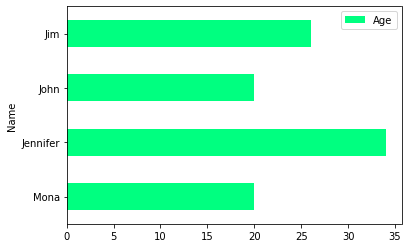

In [30]:
import matplotlib.pyplot as plt

# check the column names of names_df
print("The column names of names_df are", names_df.columns)

# convert to pandas dataframe
df_pandas = names_df.toPandas()

# create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

### Part 1: Create a DataFrame from CSV file

In [31]:
file_path = "../data/DataCamp/Big Data Fundamentals via PySpark/Fifa2018_dataset.csv"

# load the DataFrame
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


There are 17981 rows in the fifa_df DataFrame


### Part 2: SQL Queries on DataFrame

In [32]:
# create a temporary view of fifa_df
fifa_df.createOrReplaceTempView("fifa_df_table")

# construct the query
query = "SELECT Age FROM fifa_df_table WHERE Nationality == 'Germany'"

# apply the SQL query
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



### Part 3: Data visualization

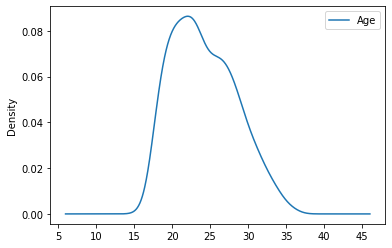

In [33]:
# convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()

## Machine Learning with PySpark MLlib

### OverView of PySpark MLlib

Various tools provided by MLlib include:
- ML Algorithms: collaborative filtering, classification, and clustering
- Featurization: feature extraction, trasnformation, dimensionality reduction, and selection
- Pipelines: tools for constructing, evaluating, and tuning ML Pipelines

PySpark MLlib Algorithms
- **Classification (Binary and Multiclass and Regression**: Linear SVMs, logistic regression, decision trees, random forests, gradient-boosted trees, naive Bayes, linear least squares, Lasso, Ridge regression, isotonic regression
- **Collaborative filtering**: Alternating least squares (ALS)
- **Clustering**: K-means, Gaussian mixture, Bisecting K-means and Streaming K-Means

PySpark MLlib import libraries
- `pyspark.mllib.recommendation`: collaborative filtering (ALS)
- `pyspark.mllib.classification`: classification and regression
- `pyspark.mllib.clustering`: clutering

*note `pyspark.mllib` can only support RDDs*

### PySpark MLlib algorithms

In [34]:
# import the library for ALS
from pyspark.mllib.recommendation import ALS

# import the library for logistic regression
from pyspark.mllib.classification import LogisticRegressionWithLBFGS

# import the library for Kmeans
from pyspark.mllib.clustering import KMeans

### Collaborative filtering

Collaborative filtering is finding users that share common interests

Collaborative filtering approaches
- **User-User Collaborative filtering**: Finds users that are similar to the target userd
- **Item-Item Collaborative filtering**: Finds and recommends items that are similar to items with the target user

Rating class
- The Rating class is a wrapper around a tuple(user, product and rating)
- Useful for parsing the RDD and creating a tuple of user, product and rating

Splitting data into training and testing sets
- PySpark's `randomSplit()` method randomly splits with the provided weights and returns multiple RDDs

Alternating Lease Squares (ALS)
- Alternating Lease Squares(ALS) algorithm in `spark.mllib` provides collaborative filtering
- `ALS.train(ratings, rank, iterations)`

Predicting data
- The `predictAll()` method returns a list of predicted ratins for input user and product pair
- The method takes in an RDD without ratings to generate the ratings

Model evaluation using MSE
- The mean squared error (MSE) is the average squared difference between the estimated values and the actual values (actual rating - predicted rating)

### Loading Movie Lens dataset into RDDs

In [35]:
from pyspark.mllib.recommendation import Rating

file_path =  "../data/DataCamp/Big Data Fundamentals via PySpark/ratings.csv"

# load the data into RDD
data = sc.textFile(file_path)

# split the RDD
ratings = data.map(lambda l: l.split(','))

# transform the ratings RDD
ratings_final = ratings.map(lambda line: Rating(int(line[0]), int(line[1]), float(line[2])))

# split the data into training and test
training_data, test_data = ratings_final.randomSplit([0.8, 0.2])

### Model training and predictions

In [36]:
# create the ALS model on the training data
model = ALS.train(training_data, rank=10, iterations=10)

# Drop the ratings column
testdata_no_rating = test_data.map(lambda p: (p[0], p[1]))

# predict the model
predictions = model.predictAll(testdata_no_rating)

# print the first rows of the RDD
predictions.take(2)

[Rating(user=452, product=1084, rating=3.1941484634455906),
 Rating(user=548, product=1084, rating=3.777553780263284)]

### Model evaluation using MSE

In [37]:
# prepare ratings data ((user, product), rating)
rates = ratings_final.map(lambda r: ((r[0], r[1]), r[2]))

# prepare predictions data ((user, product, rating))
preds = predictions.map(lambda r: ((r[0], r[1]), r[2]))

# join the ratings data with predicionts data
rates_and_preds = rates.join(preds)

# calculate and print MSE
MSE = rates_and_preds.map(lambda r: (r[1][0] - r[1][1])**2).mean()

print("Mean Squared Error of the model for the test data = {:.2f}".format(MSE))

Mean Squared Error of the model for the test data = 1.35


### Classification

- Classification is a supervised machine learning algorithm for sorting the input data into different categories

Introduction to Logistic Regression
- Logistic Regression predicts a binary response based on some variables

Working with Vectors
- PySpark MLlib contains specific data types Vectors and LabelledPoint
- Two types of Vectors
    - Dense Vector: stores all their entries in an array of floating points numbers
    - Sparse Vector: stores only the nonzero values and their indices
    
LabelledPoint()
- A LabeledPoint is a wrapy for input features and predicted value

HashingTF()
- `HashingTF()` algorithm is used to map feature value to indices in the feature vector

### Loading spam and non-spam data

In [38]:
file_path_spam = "../data/DataCamp/Big Data Fundamentals via PySpark/spam.txt"
file_path_non_spam = "../data/DataCamp/Big Data Fundamentals via PySpark/ham.txt"

# Load the datasets into RDDs
spam_rdd = sc.textFile(file_path_spam)
non_spam_rdd = sc.textFile(file_path_non_spam)

# Split the email messages into words
spam_words = spam_rdd.map(lambda email: email.split(' '))
non_spam_words = non_spam_rdd.map(lambda email: email.split(' '))

# Print the first element in the split RDD
print("The first element in spam_words is", spam_words.first())
print("The first element in non_spam_words is", non_spam_words.first())

The first element in spam_words is ['You', 'have', '1', 'new', 'message.', 'Please', 'call', '08712400200.']
The first element in non_spam_words is ['Rofl.', 'Its', 'true', 'to', 'its', 'name']


### Feature hashing and LabelPoint

In [49]:
from pyspark.mllib.feature import HashingTF
from pyspark.mllib.regression import LabeledPoint

# Create a HashingTf instance with 200 features
tf = HashingTF(numFeatures=200)

# Map each word to one feature
spam_features = tf.transform(spam_words)
non_spam_features = tf.transform(non_spam_words)

# Label the features: 1 for spam, 0 for non-spam
spam_samples = spam_features.map(lambda features:LabeledPoint(1, features))
non_spam_samples = non_spam_features.map(lambda features:LabeledPoint(0, features))

# Combine the two datasets
samples = spam_samples.union(non_spam_samples)

### Logistic Regression model training

In [51]:
# split the data into training and testing
train_samples, test_samples = samples.randomSplit([0.8, 0.2])

# train the model
model = LogisticRegressionWithLBFGS.train(train_samples)

# create a prediction label from the test data
predictions = model.predict(test_samples.map(lambda x: x.features))

# combine original labels with the predicted labels
labels_and_preds = test_samples.map(lambda x: x.label).zip(predictions)

# check the accuracy of the model on the test data
accuracy = labels_and_preds.filter(lambda x: x[0] == x[1]).count() / float(test_samples.count())

print("Model accuracy : {:.2f}".format(accuracy))

Model accuracy : 0.86


### Clustering

- Clustering is the unsupervised learning taks to organize a collection of data into groups

K-means Clustering
- Training K-means model iks done using `KMeans.train()` method
- Getting cluster centers using `model.clusterCenters`

### Loading and parsing the 5000 points data

In [55]:
file_path = "../data/DataCamp/Big Data Fundamentals via PySpark/5000_points.txt"

# load the dataset into a RDD
clusterRDD = sc.textFile(file_path)

# split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split("\t"))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 5000 rows in the rdd_split_int dataset


### K-means training

In [65]:
from math import sqrt

# error function
def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

# train the model with clusters from 13 to 16 and compute WSSSE
for clt in range(13, 17):
    model = KMeans.train(rdd_split_int, clt, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x,y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clt, WSSSE))

# train the model again with the best k
model = KMeans.train(rdd_split_int, k=15, seed=1)

# get custer centers
cluster_centers = model.clusterCenters

The cluster 13 has Within Set Sum of Squared Error 249164132.49410182
The cluster 14 has Within Set Sum of Squared Error 209371154.24941802
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 202384225.6640126


### Visualizing clusters

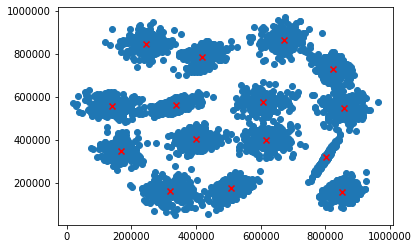

In [69]:
import pandas as pd

# convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema =["col1", "col2"])

# convert spark dataframe into pandas dataframe
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# convert cluster_centers into Panda dataframe
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns = ["col1", "col2"])

# create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"])
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red",
           marker="x")
plt.show()

In [70]:
# close connection
sc.stop()
spark.stop()